In [2]:
import sys
sys.path.insert(0,r"C:\Users\Mayank\Desktop\RAJALI 2025\Fly-By-Data-main\main libraries") # folder which has main loading libs
import mavlab
import senlab
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
log_filename = '2025-10-09 14-43-07.bin-1608525.mat'
# log_filename = '2024-03-25 16-42-23.bin-792718.mat'
log_path = r'C:\Users\Mayank\Desktop\RAJALI 2025\Fly-By-Data-main\sample_mavlink'
params = ['AHR2','ATT','BARO_0','BAT_0','GPS_0','XKF1_0','RATE','RCOU']
log_filename  = '//'.join(log_path.split('\\')[:]) + '//' + log_filename

data = mavlab.data(log_filename,params)
time = mavlab.timedata_gpscor(log_filename,params)

Loading Data from Log File		: 100%|████████████████████████████████████████████████████████████
Loading Time Data from Log File		: 100%|████████████████████████████████████████████████████████████


In [4]:
sen_filename = '2025_10_9_13_12_26_01.csv'
# sen_filename = '2025_10_9_13_12_26.csv'
sen_path = r'C:\Users\Mayank\Desktop\RAJALI 2025\Fly-By-Data-main\sample_sensor'
sen_filename  = '//'.join(sen_path.split('\\')[:]) + '//' + sen_filename
sen_data = senlab.tsm_data_simple(sen_filename)
sen_data_inter = senlab.read_csv_interp(sen_filename,5,10)


Loading Data from Sensor File		: 100%|████████████████████████████████████████████████████████████


In [5]:
# If there is a offset in time given by RTC, adjust here by changing the minutes value

import pandas as pd
csv_path = r'C:\Users\Mayank\Desktop\RAJALI 2025\Fly-By-Data-main\sample_sensor\2025_10_9_13_12_26_01.csv'
df = pd.read_csv(csv_path)

sen_time =  np.array(sen_data['Time Stamp'])

for i in range(len(sen_time)):
    sen_time[i] = datetime.datetime.strptime(sen_time[i], '%Y_%m_%d_%H_%M_%S') + datetime.timedelta(minutes= 93)

print(sen_time[0:5])
print(time['XKF1_0'][0:560])



[datetime.datetime(2025, 10, 9, 14, 45, 26)
 datetime.datetime(2025, 10, 9, 14, 45, 26)
 datetime.datetime(2025, 10, 9, 14, 45, 27)
 datetime.datetime(2025, 10, 9, 14, 45, 27)
 datetime.datetime(2025, 10, 9, 14, 45, 27)]
[datetime.datetime(2025, 10, 9, 14, 43, 25, 397695)
 datetime.datetime(2025, 10, 9, 14, 43, 25, 498075)
 datetime.datetime(2025, 10, 9, 14, 43, 25, 598069)
 datetime.datetime(2025, 10, 9, 14, 43, 25, 698077)
 datetime.datetime(2025, 10, 9, 14, 43, 25, 798076)
 datetime.datetime(2025, 10, 9, 14, 43, 25, 898110)
 datetime.datetime(2025, 10, 9, 14, 43, 25, 998123)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 98150)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 198118)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 298100)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 398123)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 498121)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 598116)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 698129)
 datetime.datetime(2025, 10, 9, 14, 43, 26, 798119)


In [ ]:
df.insert(0, 'Corrected Time', sen_time)

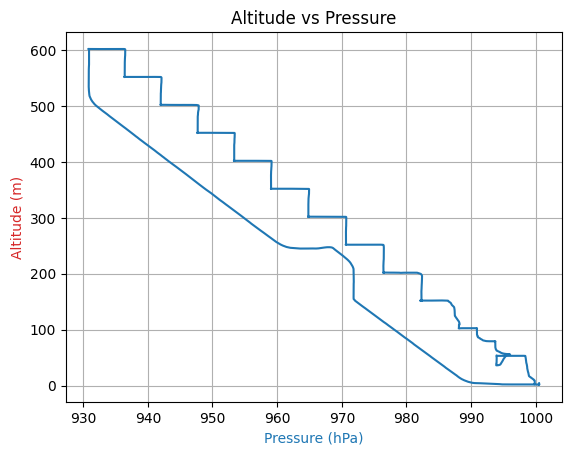

In [7]:
# Headers of CSV file:
# 'Time Stamp'	'Wind Speed (m/s)'	'Horizontal Wind Direction (Degrees)'	'U Vector (m/s)'	'V Vector (m/s)'	'W Vector (m/s)'	'Temperature (TSM) (C)'	'Relative Humidity (TSM) (%)'	'Absolute Pressure (TSM) (hPa)'	'Pitch Angle (Degrees)'	'Roll Angle (Degrees)'	'Temperature (AHT10) (C)'	'Relative Humidity (AHT10) (%)'	'Temperature (MS5611) (C)'	'Absolute Pressure (MS5611) (hPa)'

# Put the required header below to extract data
pressure = np.array(sen_data_inter['Absolute Pressure (TSM) (hPa)'])
alt = np.array(data['XKF1_0']['PD'])

n = 0
y = 0
x = len(alt) + n + y

pressure = np.array(pressure[n:x])
alt = np.array(-alt[y:x])

# fig, ax1 = plt.subplots(figsize=(10,4),dpi=200)

## Plotting Individual Data 
# plt.plot(pressure, color='tab:blue')

# Plotting with time on x axis
# plt.plot(sen_time, pressure, color='tab:blue')

## Ploting data and altitude on x axis

# ax1.plot(pressure, color='tab:blue')
# ax1.set_ylabel('Pressure (hPa)', color='tab:blue')
# # ax1.set_xlim(0,1000)

# ax2 = ax1.twinx()
# ax2.plot(alt, color='tab:red')
# ax2.set_ylabel('Altitude (m)', color='tab:red')


# plt.title("Pressure and Altitude vs Samples")
# plt.show()

## Plotting Pressure vs Altitude

plt.figure()
plt.plot(pressure, alt, color='tab:blue')
plt.xlabel('Pressure (hPa)', color='tab:blue')
plt.ylabel('Altitude (m)', color='tab:red')
plt.title('Altitude vs Pressure')
plt.grid(True)
plt.show()
